In [1]:
%matplotlib inline

## Definitions
### These are values defined in the Arduino code and documented in "Bluetooth.java" in the application

In [2]:
D_SAMPLING_FREQUENCY = 500

### Pull in the libraries and define the functions we will be using

In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
plt.style.use('ggplot')

### This function pulls in the data for each channel

In [4]:
def getChannelData(iChannel, strTestCase):
    cwd = os.getcwd()
    cwd = cwd+'\\CodeValidationData\\'+strTestCase

    f = []
    for (dirpath, dirnames, filenames) in os.walk(cwd):
        f.extend(filenames)
        break
        
    strFileSearch = 'Trace0' + str(iChannel)
    strFiles = filter(lambda x:strFileSearch in x, f)
    
    
    for idx in range(0, len(strFiles)):
        fh = open(cwd+'\\'+strFiles[idx], 'rb')
        # read the data into numpy
        if(idx==0):
            xEnd = np.fromfile(fh, dtype=('>f'))
        else:
            xEnd = np.append(x, np.fromfile(fh, dtype=('>f')))
        fh.close()
    
    # We have to switch the underlying NumPy array to native system
    # Great write up at: http://pandas.pydata.org/pandas-docs/stable/gotchas.html. 
    # If you don't do this you get an error: ValueError: Big-endian buffer not supported on little-endian compiler
    x = xEnd.byteswap().newbyteorder()
    
    return (x,strFiles)

### This function pulls the arrays from the data file function into a single data frame and addes the extracted values

In [5]:
def getDataAsFrame(strTestCase):

    # Read the data in
    (x1,strFiles1) = getChannelData(1,strFolder)
    (x2,strFiles2) = getChannelData(2,strFolder)
    (x3,strFiles3) = getChannelData(3,strFolder)
    (x4,strFiles4) = getChannelData(4,strFolder)
    t = np.divide(range(0,len(x1)),D_SAMPLING_FREQUENCY)

    # Construct the data frame
    dfData = pd.DataFrame(data={('t'):t,
                                ('XAcc'):x1, 
                                ('YAcc'):x2, 
                                ('ZAcc'):x3, 
                                ('Light'):x4,
                                'Surface':strTestCase})
    
    return dfData

### This function appends one dataframe to another

In [6]:
def appendDataAsFrame(strTestCase, dfData):
    dfNew = getDataAsFrame(strTestCase)
    dfDataOut = dfData.append(dfNew)
    dfDataOut = dfDataOut.reset_index(drop=True)

    return dfDataOut

### This function plots the timebase data in the data frame

In [7]:
def plotFolder(dfDataPlot, strClass):
    
    fig, axes = plt.subplots(nrows=2, ncols=2)
    fig.subplots_adjust(wspace=.5, hspace=0.5)
    
    strColName = 'XAcc'
    ax = dfDataPlot.plot(x='t', y=strColName, 
                     ax=axes[0,0], legend=True, figsize=(10,10))
    ax.set_xlabel('Time, seconds')
    ax.set_ylabel('Amplitude, ADC counts')
    ax.set_title(strColName+'_'+strClass)

    strColName = 'YAcc'
    ax = dfDataPlot.plot(x='t', y=strColName, 
                     ax=axes[0,1], legend=True, figsize=(10,10))
    ax.set_xlabel('Time, seconds')
    ax.set_ylabel('Amplitude, ADC counts')
    ax.set_title(strColName+'_'+strClass)

    strColName = 'ZAcc'
    ax = dfDataPlot.plot(x='t', y=strColName, 
                     ax=axes[1,0], legend=True, figsize=(10,10))
    ax.set_xlabel('Time, seconds')
    ax.set_ylabel('Amplitude, ADC counts')
    ax.set_title(strColName+'_'+strClass)

    strColName = 'Light'
    ax = dfDataPlot.plot(x='t', y=strColName, 
                     ax=axes[1,1], legend=True, figsize=(10,10))
    ax.set_xlabel('Time, seconds')
    ax.set_ylabel('Amplitude, ADC counts')
    ax.set_title(strColName+'_'+strClass)


### Get the data into python

In [8]:
strFolder = '170319_001'
dfData = getDataAsFrame(strFolder)


### Plot out the data

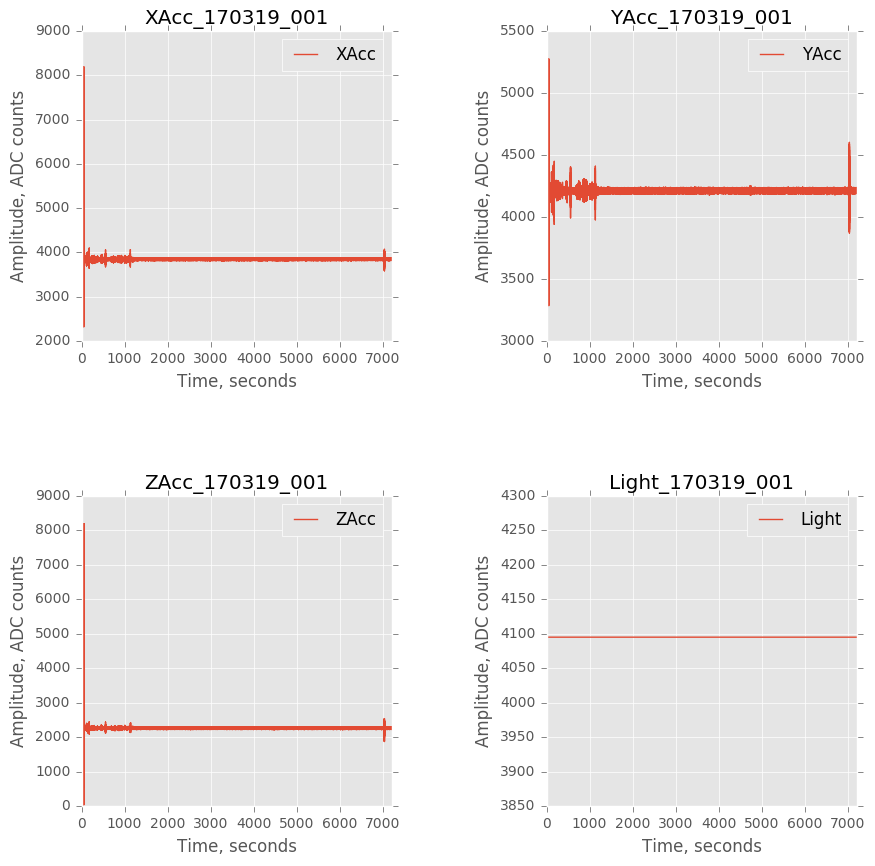

In [9]:
plotFolder(dfData.loc[dfData['Surface'] == strFolder], strFolder)

In [10]:
dfData.head(10)

,Light,Surface,XAcc,YAcc,ZAcc,t
0,4095.0,170319_001,3264.0,4117.0,2437.0,0
1,4095.0,170319_001,3269.0,4116.0,2408.0,0
2,4095.0,170319_001,3284.0,4125.0,2424.0,0
3,4095.0,170319_001,3286.0,4123.0,2425.0,0
4,4095.0,170319_001,3270.0,4134.0,2421.0,0
5,4095.0,170319_001,3261.0,4128.0,2429.0,0
6,4095.0,170319_001,3281.0,4123.0,2403.0,0
7,4095.0,170319_001,3261.0,4120.0,2421.0,0
8,4095.0,170319_001,3267.0,4127.0,2428.0,0
9,4095.0,170319_001,3261.0,4115.0,2434.0,0


In [11]:
500*3600

1800000